In [1327]:
#Импортируем модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1462]:
%matplotlib inline

In [1464]:
df = pd.read_csv('C:\\Users\\rakhm\\Downloads\\Telegram Desktop\\Stars.csv')

In [1466]:
# проверяем, что данные загрузились - выводим первые 10 строк таблицы
df.head(10)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
5,2840,0.000650,0.1100,16.98,0,Brown Dwarf,Red,M
6,2637,0.000730,0.1270,17.22,0,Brown Dwarf,Red,M
7,2600,0.000400,0.0960,17.40,0,Brown Dwarf,Red,M
8,2650,0.000690,0.1100,17.45,0,Brown Dwarf,Red,M
9,2700,0.000180,0.1300,16.05,0,Brown Dwarf,Red,M


## Описание данных

* Temperature (K): Абсолютная температура звезды в кельвинах.
* Luminosity (L/Lo): Относительная luminosity звезды по сравнению с солнечной (Lo = 3.828 × 10^26 Вт).
* Radius (R/Ro): Относительный радиус звезды по сравнению с солнечным (Ro = 6.9551 × 10^8 м).
* Absolute Magnitude (Mv): Абсолютная величина звезды, отражающая её яркость на расстоянии 10 парсеков).
* Star Type: Тип звезды (например, коричневой карлик, красный карлик и т.д.).
* Star Category: Категория звезды, в данном случае все звезды являются коричневыми карликами.
* Цвет звезды (например, красный).
* Спектральный класс звезды (например, M).пример, M).ер, M).

## Разведочный анализ данных (РАД, EDA)На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- для задач классификации: сколько у нас классов - два или больше? Сбалансированы ли классы?
- и др.

В зависимости от формы представления результатов РАД можно разделить на:
- числовой/табличный анализ
- визуальный (графический) анализ

В зависимости от кол-ва одновременно исследуемых признаков РАД можно разделить на:
- одномерный анализ (univariate analysis) - исследование каждого признака в отдельности
- двумерный анализ (bivariate analysis) - исследование взаимного влияния признаков и сравнение их характеристик
- многомерный анализ (multivariate analysis) - сравнение статистических характеристик нескольких признаков , то они несбалансированы.

In [1470]:
# объём данных
df.shape

(240, 8)

In [1471]:
# типы данных
df.dtypes

Temperature (K)              int64
Luminosity (L/Lo)          float64
Radius (R/Ro)              float64
Absolute magnitude (Mv)    float64
Star type                    int64
Star category               object
Star color                  object
Spectral Class              object
dtype: object

In [1474]:
# Целевой признак - "Absolute magnitude (Mv)"

In [1475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [1477]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке Temperature (K) = 0
Кол-во пропусков в колонке Luminosity (L/Lo) = 0
Кол-во пропусков в колонке Radius (R/Ro) = 0
Кол-во пропусков в колонке Absolute magnitude (Mv) = 0
Кол-во пропусков в колонке Star type = 0
Кол-во пропусков в колонке Star category = 0
Кол-во пропусков в колонке Star color = 0
Кол-во пропусков в колонке Spectral Class = 0


In [1479]:
# Количество пропущенных значений
df.isnull().sum()

Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

In [1481]:
# Имена колонок в виде списка
df.columns

Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

In [1482]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity (L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius (R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude (Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


In [1484]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Количество уникальных значений в '{column}': {len(unique_values)}")

Количество уникальных значений в 'Temperature (K)': 228
Количество уникальных значений в 'Luminosity (L/Lo)': 208
Количество уникальных значений в 'Radius (R/Ro)': 216
Количество уникальных значений в 'Absolute magnitude (Mv)': 228
Количество уникальных значений в 'Star type': 6
Количество уникальных значений в 'Star category': 6
Количество уникальных значений в 'Star color': 19
Количество уникальных значений в 'Spectral Class': 7


In [1485]:
spectral_class_mapping = {
    'Red': 1,'Blue': 2,
    'Blue-white': 3,
    'Blue White': 3,
    'yellow-white': 4,
    'White': 5,
    'Blue white': 3,
    'Yellowish White': 6,
    'white': 5,
    'Whitish': 7,
    'Orange': 8,
    'yellowish': 9,
    'Pale yellow orange': 10,
    'White-Yellow': 4,
    'Blue': 2,
    'Yellowish': 9,
    'Orange-Red': 11}
df['Star color'] = df['Star color'].map(spectral_class_mapping)
df

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,1.0,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,1.0,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,1.0,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,1.0,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,1.0,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,2.0,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,2.0,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,5.0,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,5.0,A


In [1489]:
spectral_class_mapping = {'O': 1,'B': 2, 'A': 3, 'F': 4,'G': 5,'K': 6,'M': 7}


df['Spectral Class'] = df['Spectral Class'].map(spectral_class_mapping)

In [1490]:
spectral_class_mapping = {
    'Brown Dwarf': 1,
    'Red Dwarf': 2,
    'White Dwarf': 3,
    'Main Sequence': 4,
    'Supergiant': 5,
    'Hypergiant': 6,
    
}

df['Star category'] = df['Star category'].map(spectral_class_mapping)
df

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,1,1.0,7
1,3042,0.000500,0.1542,16.60,0,1,1.0,7
2,2600,0.000300,0.1020,18.70,0,1,1.0,7
3,2800,0.000200,0.1600,16.65,0,1,1.0,7
4,1939,0.000138,0.1030,20.06,0,1,1.0,7
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,6,2.0,1
236,30839,834042.000000,1194.0000,-10.63,5,6,2.0,1
237,8829,537493.000000,1423.0000,-10.73,5,6,5.0,3
238,9235,404940.000000,1112.0000,-11.23,5,6,5.0,3


## Визуальный анализ

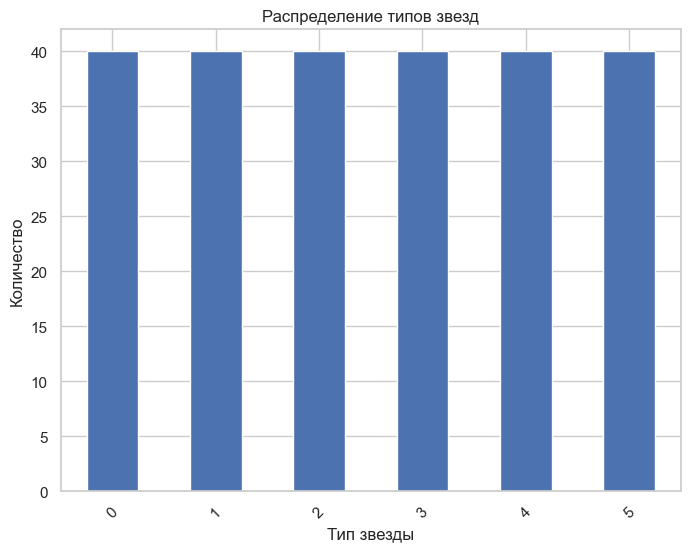

In [1493]:
plt.figure(figsize=(8, 6))
df['Star type'].value_counts(normalize=False).plot.bar()
plt.title('Распределение типов звезд')
plt.xlabel('Тип звезды')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

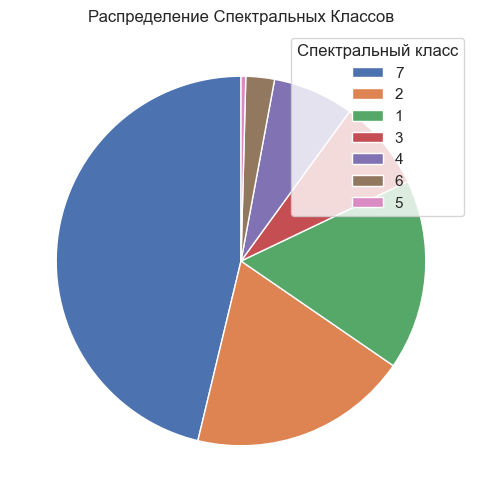

In [1495]:
plt.figure(figsize=(8, 6))
df['Spectral Class'].value_counts(normalize=True).plot.pie(startangle=90,labels=None)
plt.title('Распределение Спектральных Классов')
plt.legend(df['Spectral Class'].value_counts().index, title='Спектральный класс', loc='upper right')
plt.ylabel('')
plt.show()

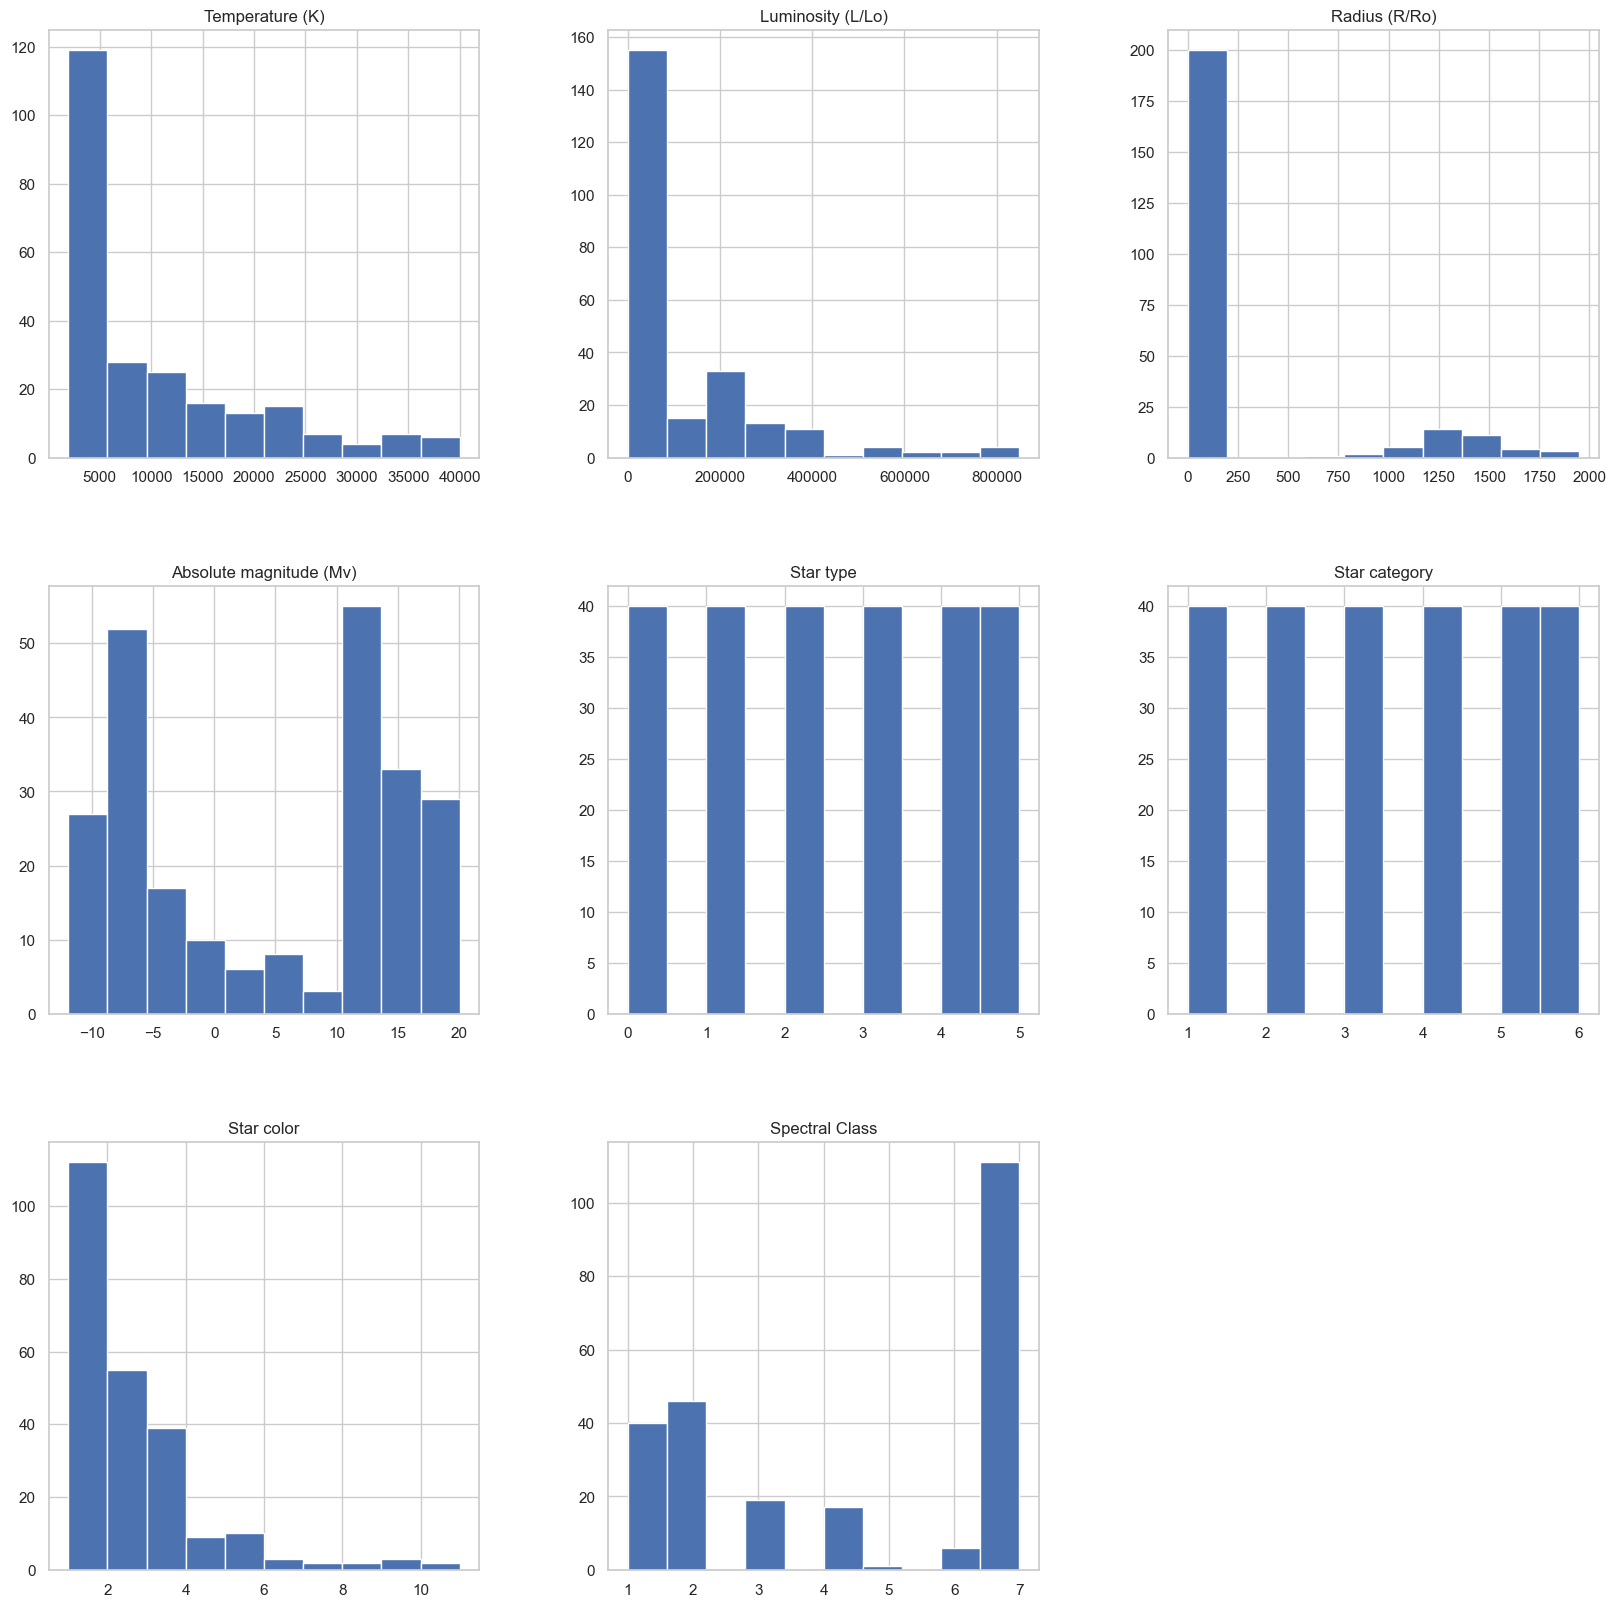

In [1497]:
# гистаграммы всех признаков
df.hist(figsize=(20,20));

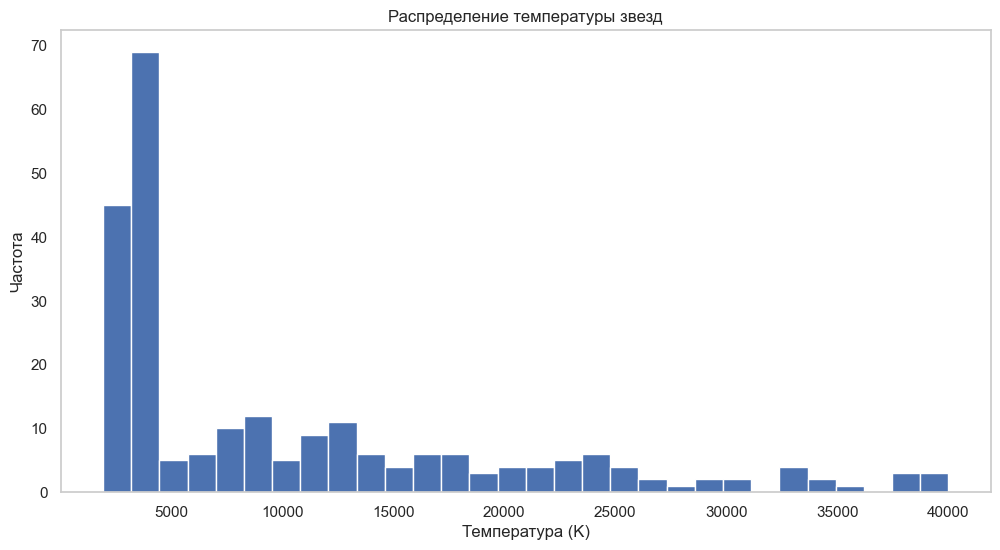

In [1498]:
plt.figure(figsize=(12, 6))
df['Temperature (K)'].hist(bins=30)
plt.title('Распределение температуры звезд')
plt.xlabel('Температура (K)')
plt.ylabel('Частота')
plt.grid(False)
plt.show()

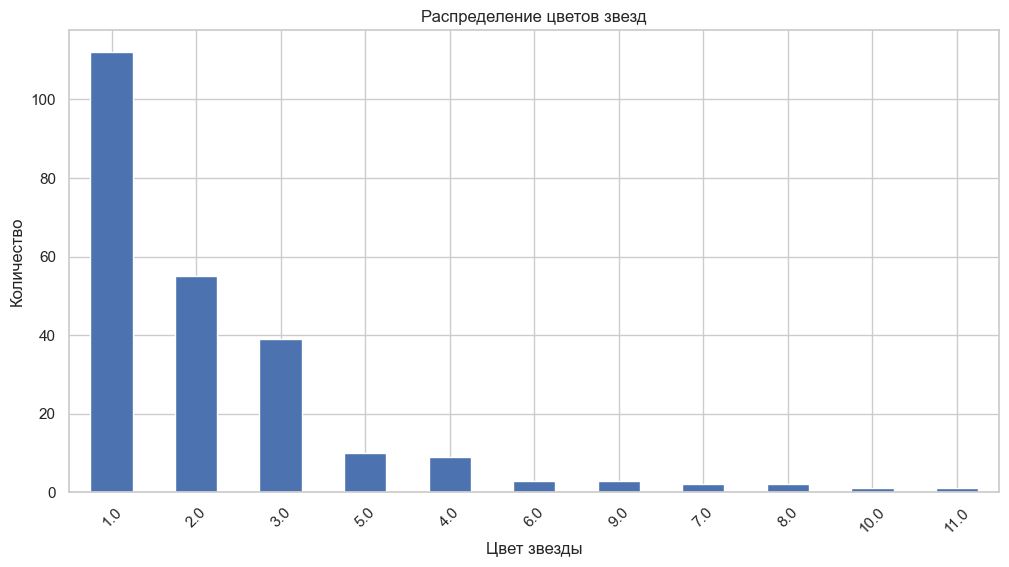

In [1499]:
plt.figure(figsize=(12, 6))
df['Star color'].value_counts().plot.bar()
plt.title('Распределение цветов звезд')
plt.xlabel('Цвет звезды')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

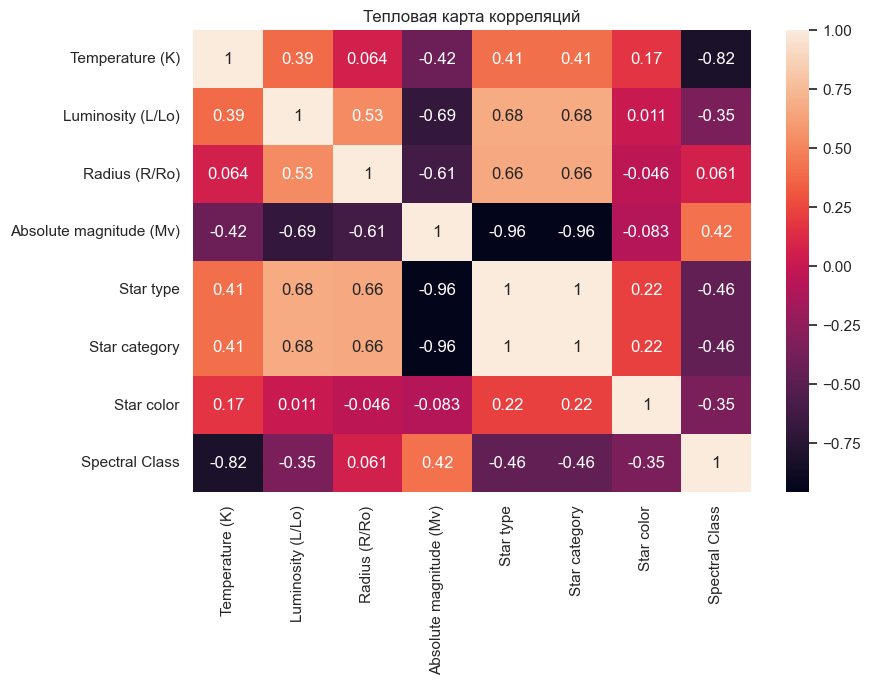

In [1500]:
plt.figure(figsize=(9, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Тепловая карта корреляций')
plt.show()

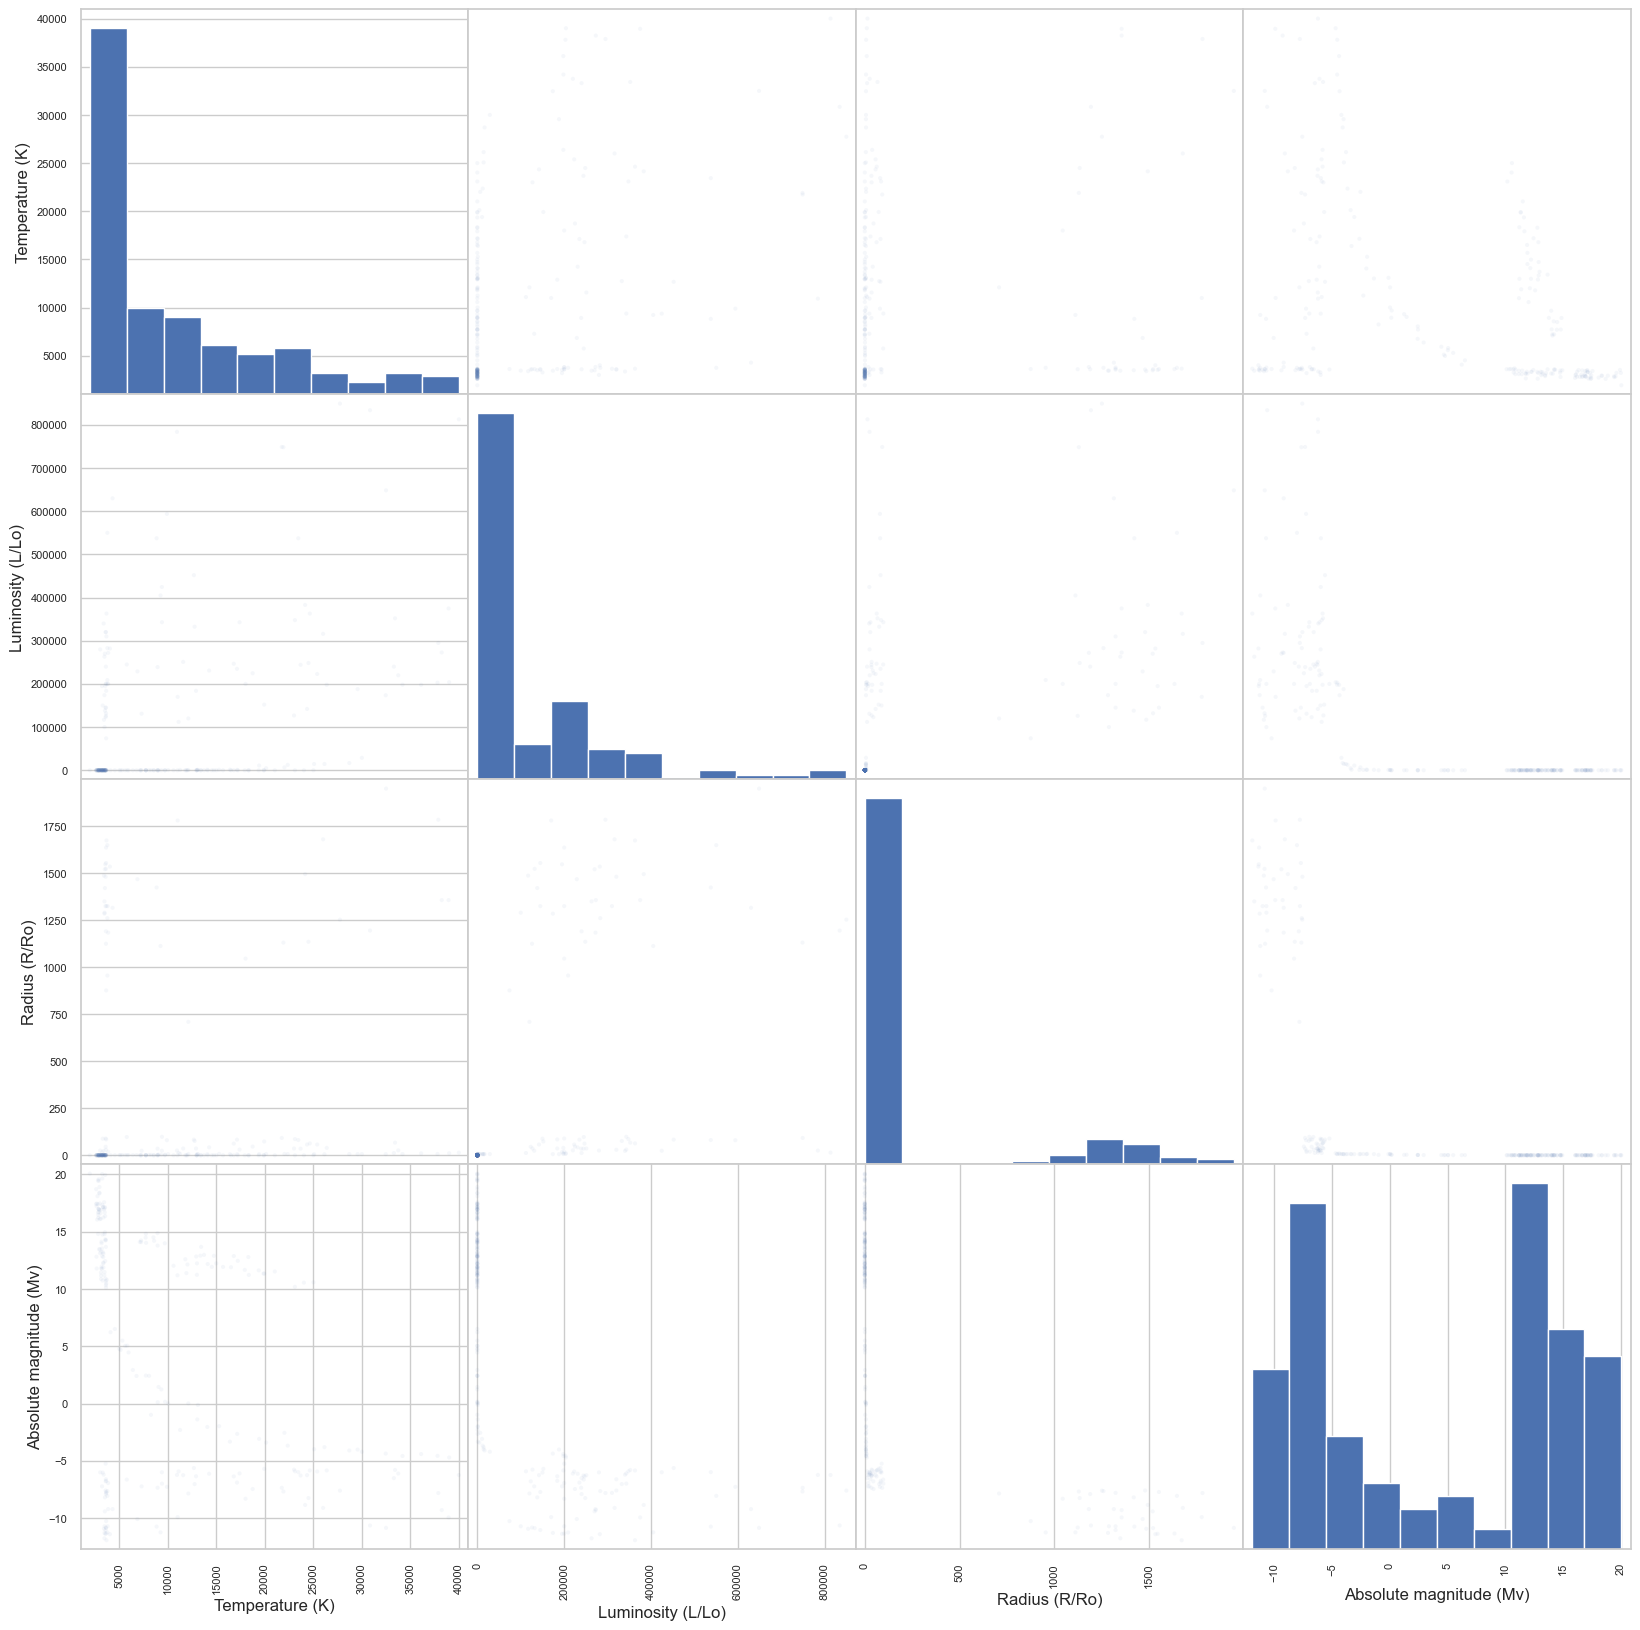

In [1502]:
from pandas.plotting import scatter_matrix

features_stars = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']
scatter_matrix(df[features_stars], alpha=0.05, figsize=(20, 20));

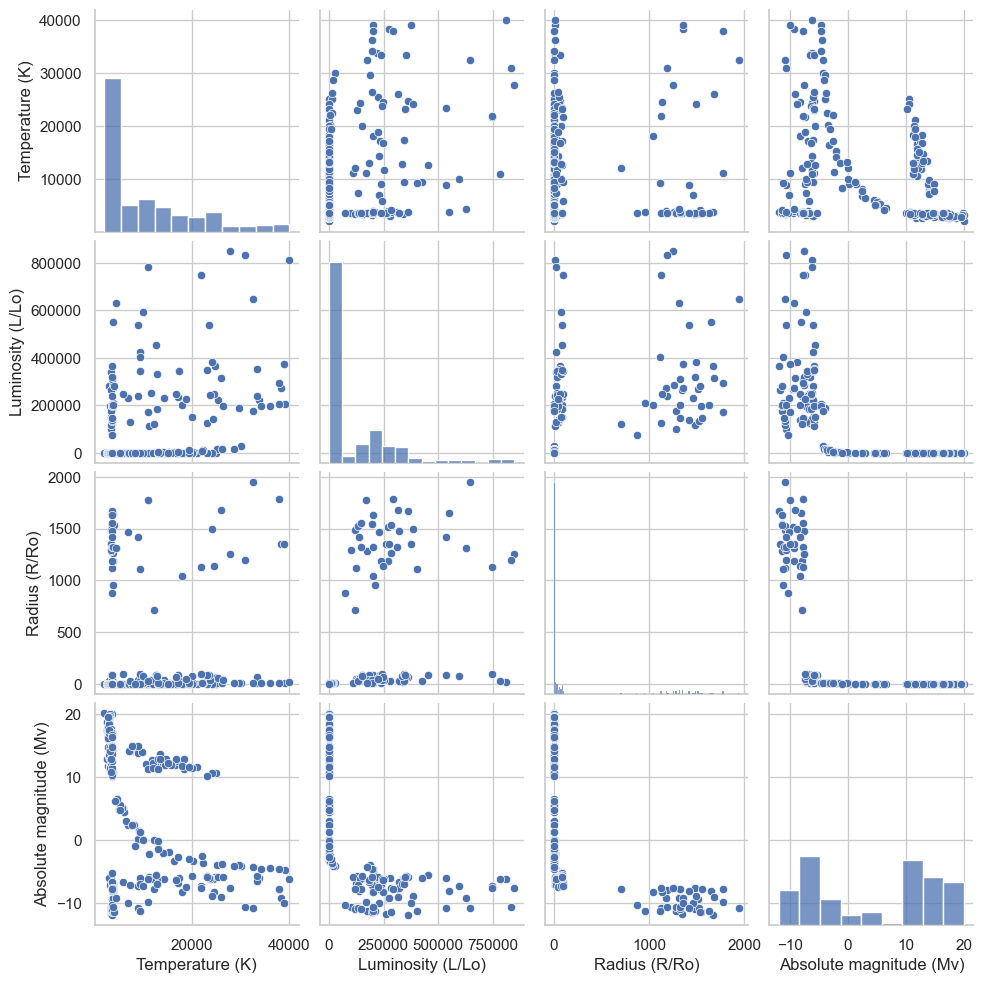

In [1503]:
sns.pairplot(df[features_stars])

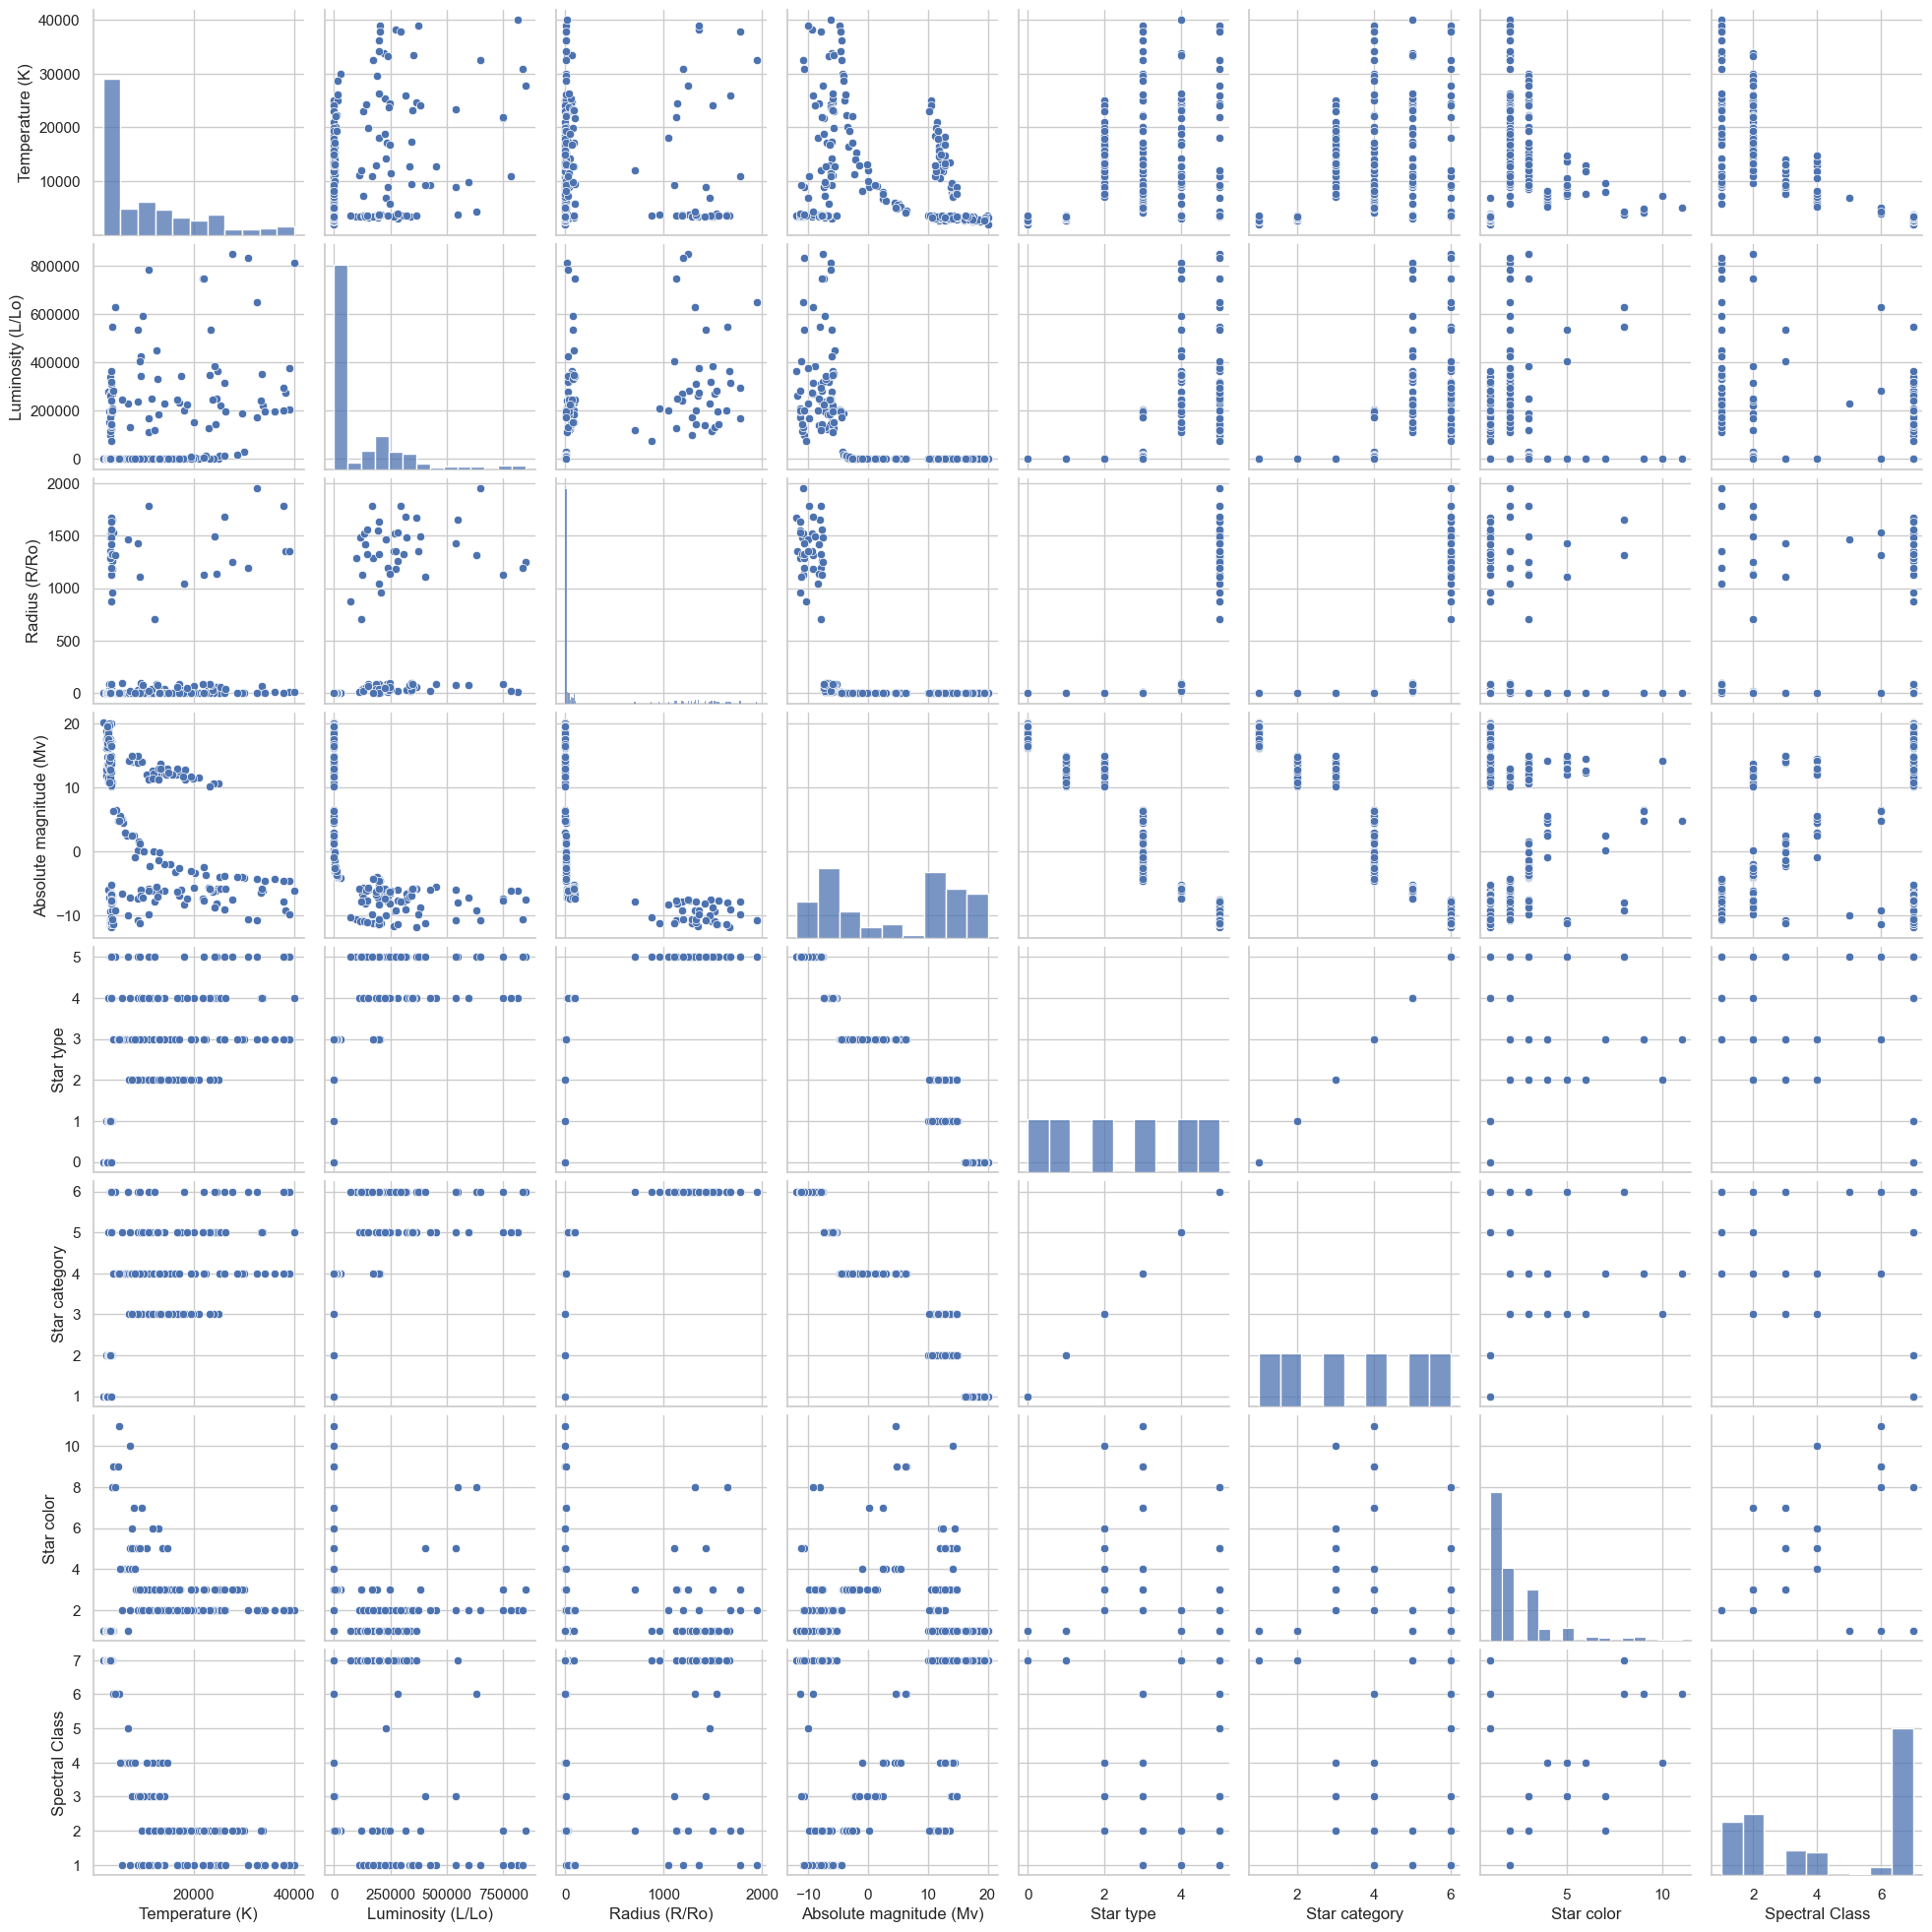

In [1504]:
sns.pairplot(df)

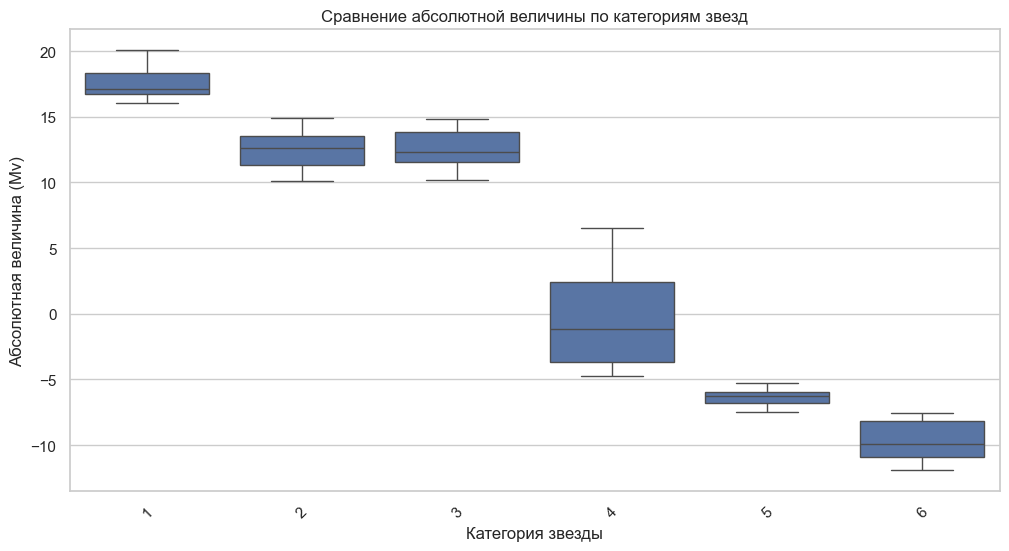

In [1505]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Star category', y='Absolute magnitude (Mv)')
plt.title('Сравнение абсолютной величины по категориям звезд')
plt.xlabel('Категория звезды')
plt.ylabel('Абсолютная величина (Mv)')
plt.xticks(rotation=45)
plt.show()

## Формирование дата-сета для обучения моделей

In [1508]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ["Temperature (K)","Luminosity (L/Lo)","Radius (R/Ro)","Absolute magnitude (Mv)","Star category","Star color","Spectral Class"]
x = df[features_names]
x.shape

(240, 7)

In [1509]:
X.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Spectral Class
0,3068,0.002400,0.1700,16.12,0,7
1,3042,0.000500,0.1542,16.60,0,7
2,2600,0.000300,0.1020,18.70,0,7
3,2800,0.000200,0.1600,16.65,0,7
4,1939,0.000138,0.1030,20.06,0,7


In [1510]:
df.dropna(inplace = True)

In [1511]:
y = df['Star type']

In [1512]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1513]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(158, 6) (79, 6) (158,) (79,)


In [1514]:
from sklearn.metrics import accuracy_score

In [1515]:
from sklearn.neighbors import KNeighborsClassifier

## KNeighborsClassifier (Классификация ближайших соседей)

In [1517]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 3.01 ms


KNeighborsClassifier()

In [1518]:
knn.predict(X_test)

array([5, 1, 3, 0, 0, 4, 0, 4, 4, 5, 0, 1, 4, 1, 5, 5, 2, 2, 2, 0, 2, 1,
       2, 4, 1, 4, 4, 5, 0, 2, 0, 0, 4, 0, 0, 1, 3, 2, 4, 1, 2, 4, 0, 2,
       1, 4, 3, 0, 0, 2, 5, 3, 0, 2, 4, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 2,
       0, 4, 4, 4, 4, 2, 4, 5, 2, 0, 4, 4, 2], dtype=int64)

In [1519]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([5, 1, 3, 0, 0, 4, 0, 4, 4, 5, 0, 1, 4, 1, 5, 5, 2, 2, 2, 0],
      dtype=int64)

array([5, 1, 3, 0, 0, 5, 0, 4, 5, 4, 0, 1, 3, 1, 5, 5, 2, 2, 2, 1],
      dtype=int64)

In [1520]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))


train accuracy:  0.7784810126582279
test accuracy:  0.6075949367088608


In [1521]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.55      0.55      0.55        11
           2       0.68      1.00      0.81        13
           3       1.00      0.36      0.53        11
           4       0.32      0.75      0.44         8
           5       0.71      0.29      0.42        17

    accuracy                           0.61        79
   macro avg       0.67      0.62      0.58        79
weighted avg       0.69      0.61      0.60        79



In [1522]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

## Gaussian Naive Bayes

In [1524]:
from sklearn.naive_bayes import GaussianNB

In [1525]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 3 ms


GaussianNB()

In [1526]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([5, 1, 3, 0, 0, 5, 0, 4, 5, 4, 0, 1, 3, 1, 5, 5, 2, 2, 2, 1],
      dtype=int64)

array([5, 1, 3, 0, 0, 5, 0, 4, 5, 4, 0, 1, 3, 1, 5, 5, 2, 2, 2, 1],
      dtype=int64)

In [1527]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.8860759493670886

In [1528]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

## Random Forest Classifier

In [1530]:
from sklearn.ensemble import RandomForestClassifier

In [1531]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 156 ms
Wall time: 154 ms


In [1532]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([5, 1, 3, 0, 0, 5, 0, 4, 5, 4, 0, 1, 3, 1, 5, 5, 2, 2, 2, 1],
      dtype=int64)

array([5, 1, 3, 0, 0, 5, 0, 4, 5, 4, 0, 1, 3, 1, 5, 5, 2, 2, 2, 1],
      dtype=int64)

In [1533]:
from sklearn.metrics import accuracy_score

In [1534]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

## Logistic Regression

In [1536]:
from sklearn.linear_model import LogisticRegression

In [1537]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1538]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 7.01 ms


LogisticRegression(random_state=42)

In [1539]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([5, 1, 3, 0, 0, 5, 0, 4, 5, 4, 0, 1, 3, 1, 5, 5, 2, 2, 2, 1],
      dtype=int64)

array([5, 1, 3, 0, 0, 5, 0, 4, 5, 4, 0, 1, 3, 1, 5, 5, 2, 2, 2, 1],
      dtype=int64)

In [1540]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

1.0

In [1541]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

## Метрики классификации

In [1543]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [1544]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

In [1545]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.607595
1,Gaussian Naive Bayes,0.886076
2,Random Forest Classifier,1.000000
3,Logistic Regression,1.000000


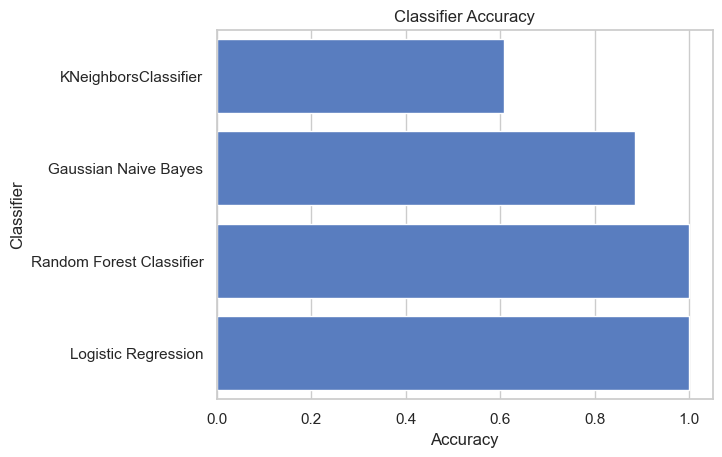

In [1546]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

In [1547]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.55      0.55      0.55        11
           2       0.68      1.00      0.81        13
           3       1.00      0.36      0.53        11
           4       0.32      0.75      0.44         8
           5       0.71      0.29      0.42        17

    accuracy                           0.61        79
   macro avg       0.67      0.62      0.58        79
weighted avg       0.69      0.61      0.60        79

